**EDA and Preprocessing**

In [187]:
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt,numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**1) Missing value**

**Dropping missing values**

In [188]:
np.nan

nan

In [189]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

In [190]:
dic = {"name":name,"math":math,"science":science}
print(dic)

{'name': ['john', 'jack', 'jill', 'kenny', 'kevin'], 'math': [89, 78, 67, nan, 85], 'science': [78, 75, nan, nan, 76]}


In [191]:
df = pd.DataFrame(dic)

In [192]:
df.head()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [193]:
df.isnull().sum()

name       0
math       1
science    2
dtype: int64

In [194]:
df.dropna()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [195]:
df.head()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [196]:
df.drop([3,2]) #it drops 3nd row and 2nd row.

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [197]:
df.drop(["math","science"],axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


**Replacing missing values**

In [198]:
df.head()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [199]:
df.fillna(0)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,0.0
3,kenny,0.0,0.0
4,kevin,85.0,76.0


In [200]:
math_mean = df["math"].mean()
science_mean = df["science"].mean()
print(math_mean)
print(science_mean)

79.75
76.33333333333333


In [201]:
df["math"].fillna(math_mean,inplace=True)

In [202]:
df["science"].fillna(science_mean,inplace=True)

In [203]:
df.head()

,name,math,science
0,john,89.00,78.000000
1,jack,78.00,75.000000
2,jill,67.00,76.333333
3,kenny,79.75,76.333333
4,kevin,85.00,76.000000


In [204]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [206]:
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [207]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
df.fillna(method="ffill",inplace=True)

In [209]:
df["Embarked"].value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

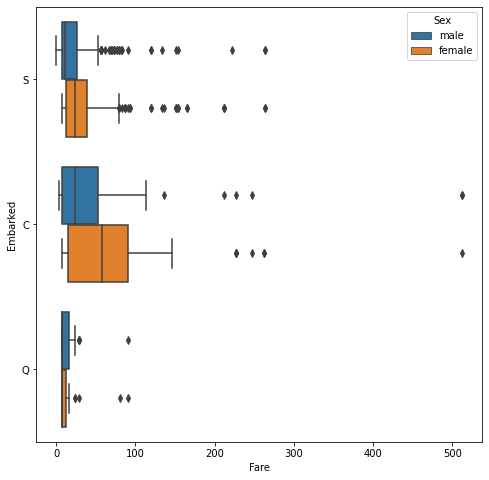

In [210]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x=df["Fare"],y=df["Embarked"],hue="Sex")
plt.show()

In [211]:
df.shape

(891, 12)

In [212]:
s_outliers=df[(df["Embarked"]=="S") & (df["Fare"]>50)].index

In [213]:
c_outliers=df[(df["Embarked"]=="C") & (df["Fare"]>200)].index

In [214]:
q_outliers=df[(df["Embarked"]=="Q") & (df["Fare"]>76)].index

In [215]:
df.drop(s_outliers,inplace=True)

In [216]:
df.drop(c_outliers,inplace=True)

In [217]:
df.drop(q_outliers,inplace=True)

In [218]:
df.shape

(781, 12)

In [219]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,C123,Q


In [220]:
max_limit = df.Fare.mean()+ 3*df.Fare.std()
min_limit = df.Fare.mean()- 3*df.Fare.std()
max_limit,min_limit

(85.2680334346511, -44.645094126072365)

In [221]:
df[(df.Fare>max_limit) | (df.Fare<min_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,40.00,1,0,PC 17569,146.5208,B78,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.00,1,0,11967,91.0792,B49,C
306,307,1,1,"Fleming, Miss. Margaret",female,0.92,0,0,17421,110.8833,C22 C26,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.00,1,0,PC 17758,108.9000,C65,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.00,1,1,16966,134.5000,E34,C
325,326,1,1,"Young, Miss. Marie Grice",female,36.00,0,0,PC 17760,135.6333,C32,C
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.00,0,0,16966,134.5000,E40,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,E50,C


removing outliers using iqr

In [222]:
q1,q3 = np.percentile(df.Fare,[25,75])

In [223]:
iqr = q3-q1
print(iqr)

18.1042


In [224]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

In [225]:
outliers = df[(df.Fare>upper_limit) | (df.Fare<lower_limit)]
outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,40.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [226]:
for i  in outliers.values:
  print(i)

[2 1 1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female' 38.0
 1 0 'PC 17599' 71.2833 'C85' 'C']
[32 1 1 'Spencer, Mrs. William Augustus (Marie Eugenie)' 'female' 40.0 1 0
 'PC 17569' 146.5208 'B78' 'C']
[35 0 1 'Meyer, Mr. Edgar Joseph' 'male' 28.0 1 0 'PC 17604' 82.1708 'B78'
 'C']
[53 1 1 'Harper, Mrs. Henry Sleeper (Myna Haxtun)' 'female' 49.0 1 0
 'PC 17572' 76.7292 'D33' 'C']
[55 0 1 'Ostby, Mr. Engelhart Cornelius' 'male' 65.0 0 1 '113509' 61.9792
 'B30' 'C']
[62 1 1 'Icard, Miss. Amelie' 'female' 38.0 0 0 '113572' 80.0 'B28' 'C']
[98 1 1 'Greenfield, Mr. William Bertram' 'male' 23.0 0 1 'PC 17759'
 63.3583 'D10 D12' 'C']
[140 0 1 'Giglio, Mr. Victor' 'male' 24.0 0 0 'PC 17593' 79.2 'B86' 'C']
[156 0 1 'Williams, Mr. Charles Duane' 'male' 51.0 0 1 'PC 17597' 61.3792
 'C2' 'C']
[196 1 1 'Lurette, Miss. Elise' 'female' 58.0 0 0 'PC 17569' 146.5208
 'B80' 'C']
[216 1 1 'Newell, Miss. Madeleine' 'female' 31.0 1 0 '35273' 113.275 'D36'
 'C']
[219 1 1 'Bazzani, Miss. Albi

In [227]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,C123,Q


In [228]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#handling categorical data

In [229]:
cat_df=df.select_dtypes(object)
num_df=df.select_dtypes(["int","float"])
print(f"no.of categorical data: {cat_df.shape[1]}")
print(f"no.of numerical data: {num_df.shape[1]}")

no.of categorical data: 5
no.of numerical data: 7


In [230]:
cat_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,C85,S
4,"Allen, Mr. William Henry",male,373450,C123,S
5,"Moran, Mr. James",male,330877,C123,Q


In [231]:
cat_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,C85,S
4,"Allen, Mr. William Henry",male,373450,C123,S
5,"Moran, Mr. James",male,330877,C123,Q


In [232]:
cat_df["Sex"].value_counts()

male      523
female    258
Name: Sex, dtype: int64

In [233]:
pd.set_option("max_columns",None)

converting categorical variable to numerical values

In [234]:
#one hot encoding
pd.get_dummies(cat_df["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
4,0,1
5,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [235]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [236]:
le = LabelEncoder()

In [237]:
cat_df["Sex"].value_counts()

male      523
female    258
Name: Sex, dtype: int64

In [238]:
le.fit_transform(cat_df["Sex"])

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [239]:
cat_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,C85,S
4,"Allen, Mr. William Henry",male,373450,C123,S
5,"Moran, Mr. James",male,330877,C123,Q


In [240]:
df["Embarked"].value_counts()

S    549
C    157
Q     75
Name: Embarked, dtype: int64

In [241]:
df["embarked_num"]=le.fit_transform(df["Embarked"])

In [242]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,2
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,C123,Q,1


In [243]:
df["embarked_num"].value_counts()

2    549
0    157
1     75
Name: embarked_num, dtype: int64

In [244]:
cat_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,C85,S
4,"Allen, Mr. William Henry",male,373450,C123,S
5,"Moran, Mr. James",male,330877,C123,Q


In [245]:
cat_df.drop(["Ticket"],axis=1,inplace=True)

In [246]:
cat_df.head()

,Name,Sex,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C
2,"Heikkinen, Miss. Laina",female,C85,S
4,"Allen, Mr. William Henry",male,C123,S
5,"Moran, Mr. James",male,C123,Q


In [247]:
for col  in cat_df:
  le = LabelEncoder()
  cat_df[col]=le.fit_transform(cat_df[col])

In [248]:
cat_df.head()

,Name,Sex,Cabin,Embarked
0,92,1,141,2
1,158,0,75,0
2,300,0,75,2
4,14,1,53,2
5,476,1,53,1


In [249]:
cat_df["Cabin"].nunique()

142

**Skewness**

In [250]:
cat_df.fillna(method="ffill",inplace=True)

In [251]:
num_df["Age"]=num_df["Age"].astype(int)

In [252]:
num_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22,1,0,7.2500
1,2,1,1,38,1,0,71.2833
2,3,1,3,26,0,0,7.9250
4,5,0,3,35,0,0,8.0500
5,6,0,3,35,0,0,8.4583


In [254]:
#df.drop(["PassnegerId",])

In [255]:
from scipy.stats import skew

PassengerId
0.01827161785819166
Survived
0.6310367941800307
Pclass
-0.9500873875539687
Age
0.3591668922568466
SibSp
2.8061570349026885
Parch
3.139787051517045
Fare
2.9795883121659683


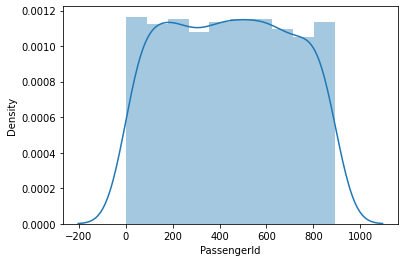

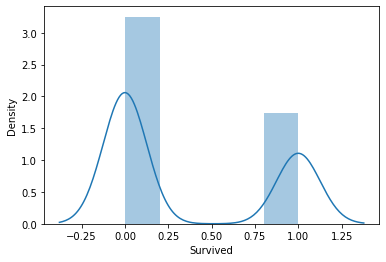

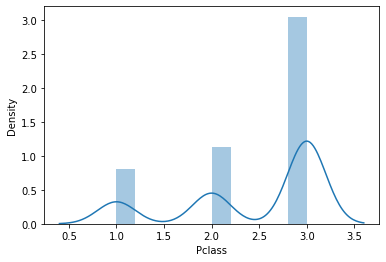

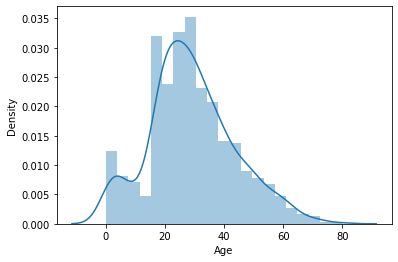

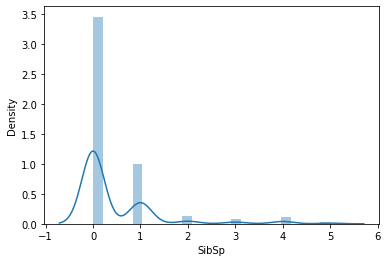

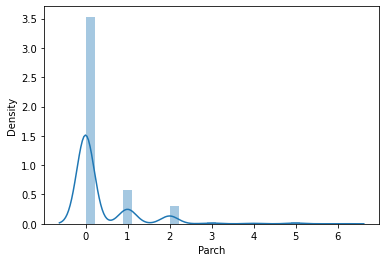

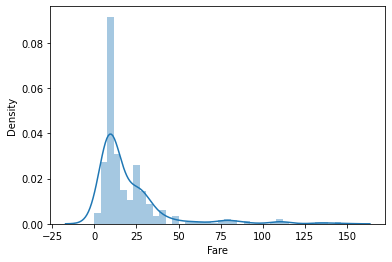

In [256]:
#to find skewness of all the numerical data and figure of distplot
for col in num_df:
  print(col)
  print(skew(num_df[col]))

  plt.figure()
  sns.distplot(num_df[col])

In [257]:
num_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.052707,-0.029498,0.023196,-0.088378,-0.002637,-0.037269
Survived,-0.052707,1.000000,-0.292222,-0.085989,-0.007493,0.082323,0.271962
Pclass,-0.029498,-0.292222,1.000000,-0.290497,0.126802,0.083789,-0.625874
Age,0.023196,-0.085989,-0.290497,1.000000,-0.315580,-0.187711,0.086258
SibSp,-0.088378,-0.007493,0.126802,-0.315580,1.000000,0.408102,0.238032
Parch,-0.002637,0.082323,0.083789,-0.187711,0.408102,1.000000,0.200851
Fare,-0.037269,0.271962,-0.625874,0.086258,0.238032,0.200851,1.000000


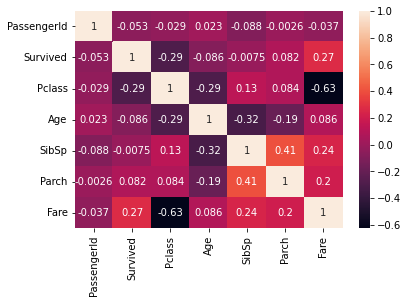

In [258]:
sns.heatmap(num_df.corr(),annot=True)

In [259]:
num_df.shape

(781, 7)

In [260]:
num_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22,1,0,7.2500
1,2,1,1,38,1,0,71.2833
2,3,1,3,26,0,0,7.9250
4,5,0,3,35,0,0,8.0500
5,6,0,3,35,0,0,8.4583


In [261]:
num_df["Parch"]=np.sqrt(num_df["Parch"])

In [262]:
num_df["Age"] = np.sqrt(num_df["Age"])

In [263]:
skew(num_df["Parch"])

1.7365367872734072

applying log transformation or square in negative number will give you null values

In [264]:
np.sqrt(-1)

nan

In [265]:
np.log(-1)

nan

In [266]:
#adding categorical and numerical values in a new df
df1 = pd.concat([cat_df,num_df],axis=1)

PassengerId


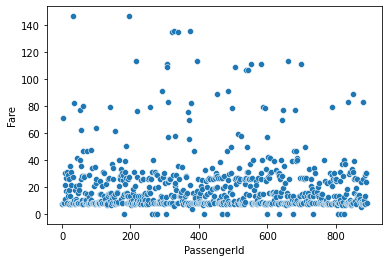

********************************************
Survived


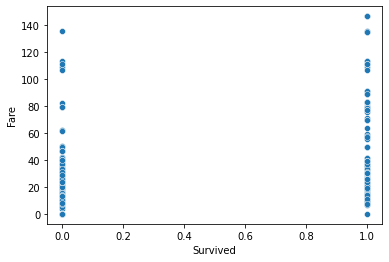

********************************************
Pclass


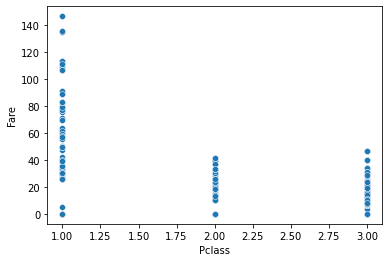

********************************************
Age


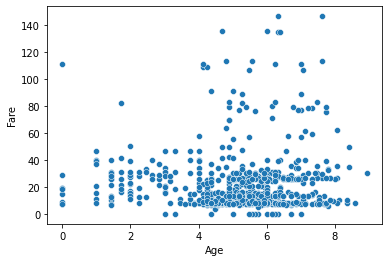

********************************************
SibSp


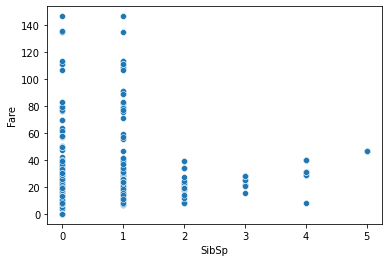

********************************************
Parch


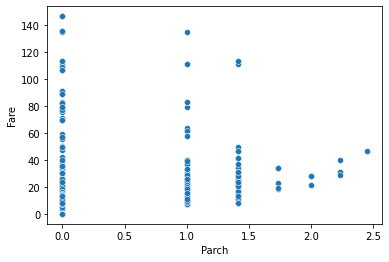

********************************************
Fare


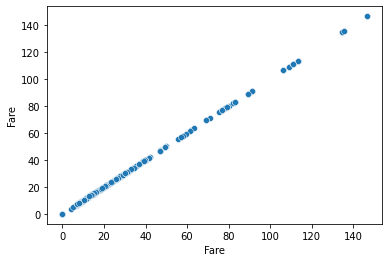

********************************************


In [267]:
for col in num_df:
  try:
    print(col)
    plt.figure()
    sns.scatterplot(data=num_df,y="Fare",x=col)
    plt.show()
  except:
    pass
  print("********************************************")

In [268]:
pd.crosstab(index=df["Pclass"],columns=df["Sex"])

Sex,female,male
Pclass,,
1,43,84
2,74,103
3,141,336


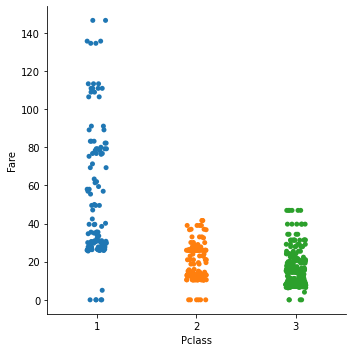

In [269]:
sns.catplot(data=df,x="Pclass",y="Fare")

In [270]:
df1.drop("Name",axis=1,inplace=True)

In [271]:
df1.drop("PassengerId",axis=1,inplace=True)

In [272]:
df1["Age"]=df1["Age"].astype(int)

In [273]:
df1.head()

,Sex,Cabin,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,141,2,0,3,4,1,0.0,7.2500
1,0,75,0,1,1,6,1,0.0,71.2833
2,0,75,2,1,3,5,0,0.0,7.9250
4,1,53,2,0,3,5,0,0.0,8.0500
5,1,53,1,0,3,5,0,0.0,8.4583


In [274]:
df1["Parch"].value_counts()	

0.000000    613
1.000000    100
1.414214     54
2.236068      5
1.732051      5
2.000000      3
2.449490      1
Name: Parch, dtype: int64

**Scaling**

In [275]:
n1 = 1000 #m
n2 = 20 #km

In [276]:
n2>n1

False

#MinMaxScalar

x_new = (x_old-min)/(max-min)

In [277]:
x=np.array([10,20,30,40,50])
y=np.array([100,200,300,400,500])

In [278]:
def minmax(ar):
    ar_new = (ar-ar.min())/(ar.max()-ar.min())
    return ar_new

In [279]:
minmax(x) #0 to 1

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [280]:
minmax(y)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [281]:
from sklearn.preprocessing import MinMaxScaler

In [282]:
mx = MinMaxScaler()

In [283]:
mx.fit_transform(df1)

array([[1.        , 1.        , 1.        , ..., 0.2       , 0.        ,
        0.04948103],
       [0.        , 0.53191489, 0.        , ..., 0.2       , 0.        ,
        0.48650635],
       [0.        , 0.53191489, 1.        , ..., 0.        , 0.        ,
        0.05408788],
       ...,
       [0.        , 0.21276596, 1.        , ..., 0.2       , 0.57735027,
        0.16004554],
       [1.        , 0.41134752, 0.        , ..., 0.        , 0.        ,
        0.20474909],
       [1.        , 0.41134752, 0.5       , ..., 0.        , 0.        ,
        0.05289351]])

In [284]:
#for col in df1:
 # mx = MinMaxScaler()
 # df1[col]=mx.fit_transform(df1[[col]]) #2darray

In [285]:
df1.head()

,Sex,Cabin,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,141,2,0,3,4,1,0.0,7.2500
1,0,75,0,1,1,6,1,0.0,71.2833
2,0,75,2,1,3,5,0,0.0,7.9250
4,1,53,2,0,3,5,0,0.0,8.0500
5,1,53,1,0,3,5,0,0.0,8.4583


Standard Scaler

Standardization
z = (x-mean)/std

In [286]:
from sklearn.preprocessing import StandardScaler

In [287]:
for col in df1:
  mx = StandardScaler()
  df1[col]=mx.fit_transform(df1[[col]])

In [288]:
df1.head()

,Sex,Cabin,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.702359,1.651945,0.616822,-0.733077,0.729332,-0.498854,0.632208,-0.502522,-0.603627
1,-1.423774,0.033471,-1.859980,1.364114,-1.913862,0.833130,0.632208,-0.502522,2.355628
2,-1.423774,0.033471,0.616822,1.364114,0.729332,0.167138,-0.484884,-0.502522,-0.572432
4,0.702359,-0.506021,0.616822,-0.733077,0.729332,0.167138,-0.484884,-0.502522,-0.566655
5,0.702359,-0.506021,-0.621579,-0.733077,0.729332,0.167138,-0.484884,-0.502522,-0.547786
